## Purpose

This notebook will analyze actual EEG recordings (non ADHD) and look into how slope affects ratio measures

In [2]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mne

from fooof import FOOOF
from fooof import FOOOFGroup
from fooof.analysis import *
import numpy as np
from utils.ratios import *
from fooof.utils import trim_spectrum
# Import some utilities for synthesizing some test data
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum


In [70]:
slopes = np.arange(.25,3,.25) # global scope - will be reset during each function call to not make things messy
theta_band = [4,8]
beta_band = [15,30]
alpha_band = [8,12]
f_range = [1, 50]

load in EEG data to MNE

In [28]:
data = mne.io.read_raw_cnt('./dat/cba/cba1ff01.cnt', mne.channels.read_montage("standard_1005"))
psds, freqs = mne.time_frequency.psd_welch(data)

  Could not parse meas date from the header. Setting to None.
The following EEG sensors did not have a position specified in the selected montage: ["T5'", "T6'", "O1'", "O2'", 'P3"', 'P4"', 'PZ"', 'I', 'CB1"', 'CB2"', 'CB1', 'CB2']. Their position has been left untouched.


<ipython-input-28-934f1e5dbd66>:1: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  data = mne.io.read_raw_cnt('./dat/cba/cba1ff01.cnt', mne.channels.read_montage("standard_1005"))
<ipython-input-28-934f1e5dbd66>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ["T5'", "T6'", "O1'", "O2'", 'P3"', 'P4"', 'PZ"', 'I', 'CB1"', 'CB2"', 'CB1', 'CB2']. Their position has been left untouched.
  data = mne.io.read_raw_cnt('./dat/cba/cba1ff01.cnt', mne.channels.read_montage("standard_1005"))


Effective window size : 0.256 (s)


In [46]:
fm?

In [74]:
fg = FOOOFGroup(peak_width_limits=[.5, 5])
fg.fit(freqs,psds,f_range)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.91 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\julio\AppData\Lo

In [75]:
fg.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 31                             
                                                                                                  
                        The model was run on the frequency range 3 - 47 Hz                        
                                 Frequency Resolution is 3.91 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 47 Hz                        
                                 Frequency Resolution is 3.91 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):                               
                                         -10.0139, 1.7459                                         
                                                                                                  
                                       3 peaks were found:                                        
          

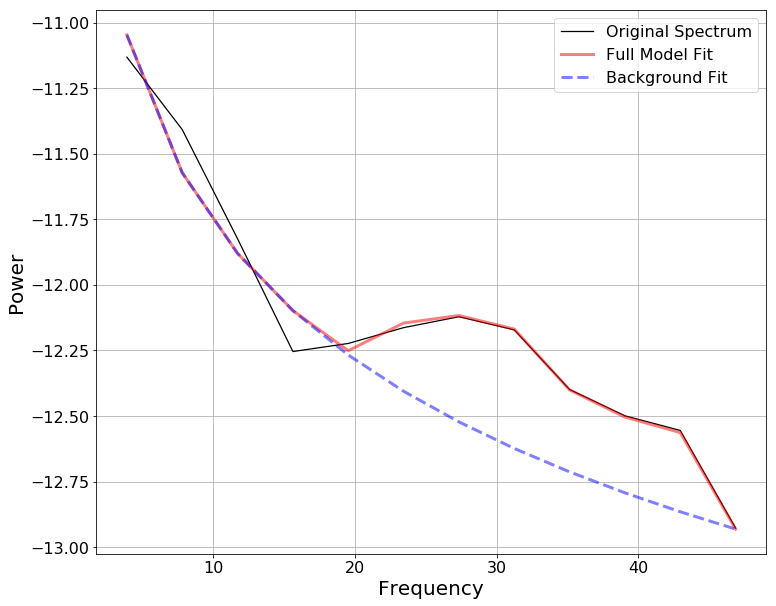

In [76]:
fm = fg.get_fooof(3,True)
fm.print_results()
fm.plot()